<a href="https://colab.research.google.com/github/hungviet0304/DS_Final_project/blob/master/Process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Section
===

In [1]:
import pandas as pd
import numpy as np
import os
import copy
import math
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier

# You can also import other things ...
# YOUR CODE HERE (OPTION)
import re
from sklearn import preprocessing

Load and split
===

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#cd "drive/My Drive/Colab Notebooks/DS/Project/Data"

In [7]:
#pwd = %pwd
#if pwd != 'C:\\Users\\Admin\\Documents\\GitHub\\DS_Final_project\\data':
#    %cd ./data

In [8]:
# load data
path = "./data"
file_list = os.listdir(path)
data_tmp = []
for file in file_list:
    df = pd.read_csv(os.path.join(path,file))
    data_tmp.append(df)
final_df = pd.concat(data_tmp, axis = 0, ignore_index=True)

In [9]:
final_df.describe(include="all")

,title,runtime,des,date,genre,cast,director,vote,gross,rating
count,80000,80000,79998,80000.000000,80000,78548,56976,8.000000e+04,4535,80000.000000
unique,61910,559,58362,NaN,1019,63173,36757,NaN,1279,NaN
top,Run,0,Add a Plot,NaN,Documentary,Josh Oreck,Kevin Dunn,NaN,$0.01M,NaN
freq,14,7366,8320,NaN,5452,26,100,NaN,346,NaN
mean,NaN,NaN,NaN,2014.018125,NaN,NaN,NaN,4.747766e+03,NaN,4.123375
std,NaN,NaN,NaN,24.784088,NaN,NaN,NaN,3.702567e+04,NaN,3.429486
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
25%,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
50%,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,1.300000e+01,NaN,5.500000
75%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,1.900000e+02,NaN,7.200000


In [10]:
df = final_df.copy()
df = df[df.rating != 0]
df = df.drop_duplicates(subset=None,keep="first")
df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Vikings,44,Vikings transports us to the brutal and my...,2013,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ...",NaN,367705,NaN,8.6
1,Game of Thrones,57,Nine noble families fight for control over...,2019,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",NaN,1625366,NaN,9.3
2,Star Wars: Episode VIII - The Last Jedi,151,Rey develops her newly discovered abilitie...,2017,"Action, Adventure, Fantasy","Daisy Ridley, John Boyega, Mark Hamill, Carrie...",Rian Johnson,513501,$620.18M,7.0
3,Captain America: The First Avenger,124,"Steve Rogers, a rejected military soldier ...",2011,"Action, Adventure, Sci-Fi","Chris Evans, Hugo Weaving, Samuel L. Jackson, ...",Joe Johnston,695269,$176.65M,6.9
4,Jack Ryan,60,"An up-and-coming CIA analyst, Jack Ryan, i...",2018,"Action, Drama, Thriller","John Krasinski, Wendell Pierce, John Hoogenakk...",NaN,72098,NaN,8.1


In [11]:
# Tách X và y
y_sr = df["rating"] # sr là viết tắt của series
X_df = df.drop("rating", axis=1)

In [12]:
# Tách tập train và tập validation theo tỉ lệ 70%:30%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.3, 
                                                              stratify=y_sr, random_state=0)

In [13]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30417 entries, 69451 to 3361
Data columns (total 9 columns):
title       30417 non-null object
runtime     30417 non-null object
des         30417 non-null object
date        30417 non-null int64
genre       30417 non-null object
cast        30100 non-null object
director    22406 non-null object
vote        30417 non-null int64
gross       2820 non-null object
dtypes: int64(2), object(7)
memory usage: 2.3+ MB


In [14]:
val_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13037 entries, 40520 to 30237
Data columns (total 9 columns):
title       13037 non-null object
runtime     13037 non-null object
des         13037 non-null object
date        13037 non-null int64
genre       13037 non-null object
cast        12936 non-null object
director    9539 non-null object
vote        13037 non-null int64
gross       1174 non-null object
dtypes: int64(2), object(7)
memory usage: 1018.5+ KB


In [15]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
69451,World War Z: Origins,8,This making-of documentary includes comments f...,2013,"Documentary, Short","Mireille Enos, Marc Forster, Dede Gardner, Jer...",NaN,33,NaN
23757,No-A,5,"The world is a desolate, unforgiving place in ...",2015,"Animation, Short, Sci-Fi",Liam Murphy,NaN,116,NaN
49570,The Text Committee,20,Welcome to The Text Committee: a secret or...,2017,Comedy,"Matthew Espinosa, Teresa Decher, Dang Matt Smi...",NaN,9,NaN
62900,The Push: Owning Your Reality Is Where the Jou...,89,"On March 5, 2010, while filming a snowmobiling...",2018,Documentary,"John Davis, Ken Evans, Tal Fletcher, Galen Gif...","Grant Korgan, Brian Niles, Geoff Callan",48,NaN
60836,Black Sheep,26,After the high-profile killing of Damilola...,2018,"Documentary, Short","Kai Francis Lewis, Nikisha Lewis, Larry Olubam...",Ed Perkins,1153,NaN


In [16]:
genre_rating_df = train_X_df["genre"].to_frame().join(train_y_sr)

In [17]:
genre_rating_df.head()

,genre,rating
69451,"Documentary, Short",6.8
23757,"Animation, Short, Sci-Fi",5.5
49570,Comedy,7.3
62900,Documentary,6.4
60836,"Documentary, Short",7.1


Investigating the influence of some features into ratings
===

Counter({'Comedy': 9936, 'Documentary': 8678, 'Drama': 8004, 'Action': 6647, 'Short': 6423, 'Adventure': 5016, 'Crime': 4280, 'Animation': 4068, 'Romance': 3407, 'Biography': 3390, 'Thriller': 1358, 'Horror': 1323, 'Family': 1288, 'History': 1278, 'Fantasy': 1136, 'Sci-Fi': 944, 'Music': 934, 'Mystery': 815, 'Sport': 549, 'Reality-TV': 198, 'News': 196, 'Musical': 193, 'War': 193, 'Talk-Show': 89, 'Western': 75, 'Game-Show': 52})
len =  26


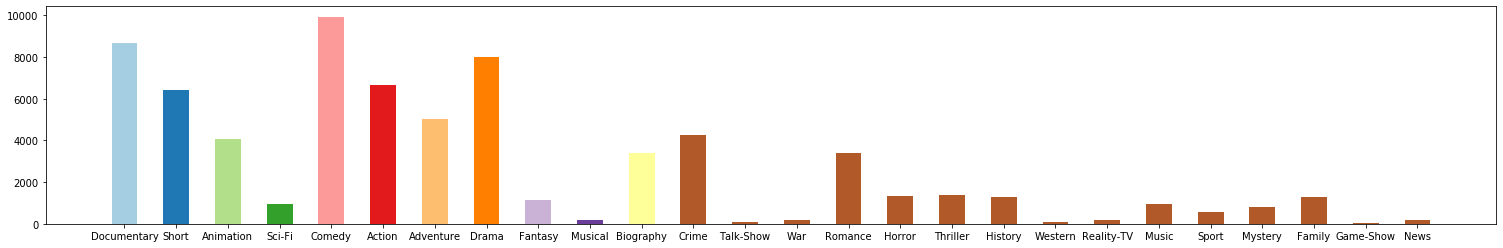

In [18]:
from collections import Counter

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
    unique_gen += g.strip().split(", ")
dict_gens = Counter(unique_gen)
print(dict_gens)
print("len = ",len(dict_gens))
plt.figure(figsize=(26,4))
plt.bar(dict_gens.keys(),dict_gens.values(), width = 0.5, color=plt.cm.Paired(np.arange(len(dict_gens))))
plt.show()

**The impact of genres on rating**

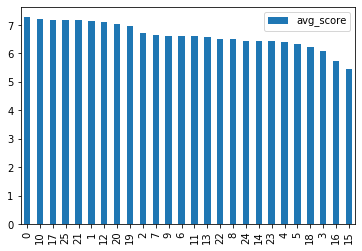

In [19]:
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df = hist_df.sort_values(by = ["avg_score"],ascending=False)
hist_df.plot.bar()


In [20]:
print(hist_df)

          genre  avg_score
0   Documentary   7.281125
10    Biography   7.216165
17      History   7.183177
25         News   7.177551
21        Sport   7.159381
1         Short   7.150989
12    Talk-Show   7.102247
20        Music   7.046788
19   Reality-TV   6.959091
2     Animation   6.732227
7         Drama   6.635432
9       Musical   6.615544
6     Adventure   6.605722
11        Crime   6.605561
13          War   6.586528
22      Mystery   6.523313
8       Fantasy   6.492254
24    Game-Show   6.444231
14      Romance   6.438127
23       Family   6.420885
4        Comedy   6.389221
5        Action   6.330074
18      Western   6.209333
3        Sci-Fi   6.099047
16     Thriller   5.750295
15       Horror   5.447317


- Nhận xét: 

Những thể loại có số lượng ít như Talk show, News, ... lại có trung bình rating cao. Nên thật khó để gom những thể loại ít thành 1 thể loại chung.

Feature Engineering
===

Compute IF-IDF of specific columns

In [21]:
class tf_idf(BaseEstimator, TransformerMixin):
  def __init__(self, columns):
    self.columns = columns
  def fit(self, X_df, y=None):
    self.vectorizer = []
    for column in self.columns:
      tf = TfidfVectorizer()
      self.vectorizer.append(tf.fit(X_df[column]))
    return self
  def transform(self, X_df, y=None):
    new_X_df = X_df.copy()
    for i, column in enumerate(self.columns):
      transformed = self.vectorizer[i].transform(new_X_df[column])
      new_X_df[column] = [transformed[j].sum() for j in range(len(new_X_df))]
    return new_X_df

Preprocessing pipeline:
  - Compute IF-IDF of text features (genre, cast, director).
  - Filling missing values by median of its columns.
  - Standard Scaling in order to help SGD, ... converging more easily.

In [22]:
columns = ['genre','cast','director']
preprocess_pipeline= Pipeline(steps=[('compute_tfidf', tf_idf(columns)),
                                     ('imputing',SimpleImputer(missing_values = 0, strategy='median')),
                                     ("scaling",StandardScaler())])

In [23]:
#replace NaN element in cast to "other"
def fill_na(df):
  df = df.drop(columns=['title','des']) # not necessary for predicting
  df["director"] = df["director"].fillna("other_director");
  df["cast"] = df["cast"].fillna("other_cast");
  df["gross"] = df["gross"].fillna("0.0");
  #define money
  money = {"M": 10**6, "B": 10**12, "G": 10**9, "P": 10**15, "K": 10**3, "0": 0}
  for i in range(len(df)):
      
      df.gross.iloc[i] = float(re.findall("\d+\.\d+", df.gross.iloc[i])[0]) * money[df.gross.iloc[i][-1]]
  return df

In [24]:
# pipeline for RandomForest
full_pipeline = Pipeline(steps=[('preprocess',preprocess_pipeline),
                                ("regress", RandomForestRegressor(max_depth=10))])

In [25]:
#pipeline for linear regression
linear_regress_pipeline = Pipeline(steps=[('preprocess',preprocess_pipeline),
                                ("regress", LinearRegression())])

Predict
===

##**Experiment with Linear Regression Model**

In [26]:
%%time
filled_train_X_df = fill_na(train_X_df)
filled_val_X_df = fill_na(val_X_df)
linear_regress_pipeline.fit(filled_train_X_df, train_y_sr)
val_err = (1- linear_regress_pipeline.score(filled_val_X_df, val_y_sr))*100
train_err = (1 -  linear_regress_pipeline.score(filled_train_X_df, train_y_sr)) * 100

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Wall time: 1min 8s


In [27]:
print("Error on train set: {}".format(train_err))
print("Error on val set: {}".format(val_err))

Error on train set: 94.81681864955344
Error on val set: 94.99050068573808


In [28]:
# get predictions
linear_preds = linear_regress_pipeline.predict(filled_val_X_df)

Visualize True and Pred values

Text(0.5, 1.0, 'Result of the first 30 entries of val set')

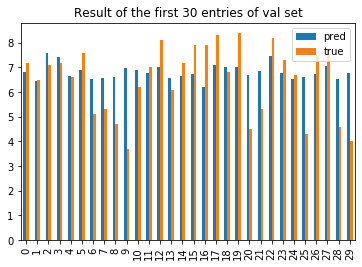

In [29]:
linear_pred_df = pd.DataFrame(columns =['pred','true'])
linear_pred_df['pred'] = linear_preds[:30]
linear_pred_df['true'] = list(val_y_sr[:30])
linear_pred_df.plot.bar()
plt.title("Result of the first 30 entries of val set")

##**Experiment RandomForest Model** (about 17mins to run)
  - Choose the best model by tuning the depth and number of tree in forest.
  - There are four choices of depth: 10, 20, 30, 40.
  - Number of trees: 40, 50, 60.
  - We decided these values because of the computational cost.

In [30]:
%%time
max_depth = [10,20,30,40]
n_estimators = [40, 50, 60]
best_depth = 0
val_errs = []
train_errs = []
best_val_err = float('inf')
best_train_err = float('inf')
best_estimator = 0
filled_train_X_df = fill_na(train_X_df)
filled_val_X_df = fill_na(val_X_df)
for estimator in n_estimators:
  print("estimator: {}".format(estimator))
  for depth in max_depth:
    print("depth: {}".format(depth))
    full_pipeline.set_params(regress__n_estimators=estimator, regress__max_depth=depth)
    full_pipeline.fit(filled_train_X_df,train_y_sr)
    cur_train_err = (1 -  full_pipeline.score(filled_train_X_df, train_y_sr)) * 100
    train_errs.append(cur_train_err)
    cur_val_err = (1- full_pipeline.score(filled_val_X_df, val_y_sr))*100
    if cur_train_err < best_train_err:
      best_train_err = cur_train_err
    val_errs.append(cur_val_err)
    if cur_val_err < best_val_err:
      best_val_err = cur_val_err
      best_estimator = estimator
      best_depth = depth


D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


estimator: 40
depth: 10
depth: 20
depth: 30
depth: 40
estimator: 50
depth: 10
depth: 20
depth: 30
depth: 40
estimator: 60
depth: 10
depth: 20
depth: 30
depth: 40
Wall time: 7min 57s


In [31]:
print("best depth: {}".format(best_depth))
print("best estimator: {}".format(best_estimator))
print("Error on train set: {}".format(best_train_err))
print("Error on val set: {}".format(best_val_err))

best depth: 40
best estimator: 60
Error on train set: 10.042747073554603
Error on val set: 71.08983596525319


In [32]:
# train again with best_depth and best_estimator
full_pipeline.set_params(regress__n_estimators=best_estimator, regress__max_depth=best_depth)
full_pipeline.fit(filled_train_X_df,train_y_sr)
forest_preds = full_pipeline.predict(filled_val_X_df)

Visualize True and Pred values

Text(0.5, 1.0, 'Result of the first 30 entries of val set')

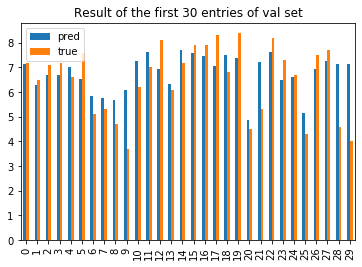

In [33]:
randomforest_df = pd.DataFrame(columns =['pred','true'])
randomforest_df['pred'] = forest_preds[:30]
randomforest_df['true'] = list(val_y_sr[:30])
randomforest_df.plot.bar()
plt.title("Result of the first 30 entries of val set")

Plot results of both linear regression and Randomforest in validation set

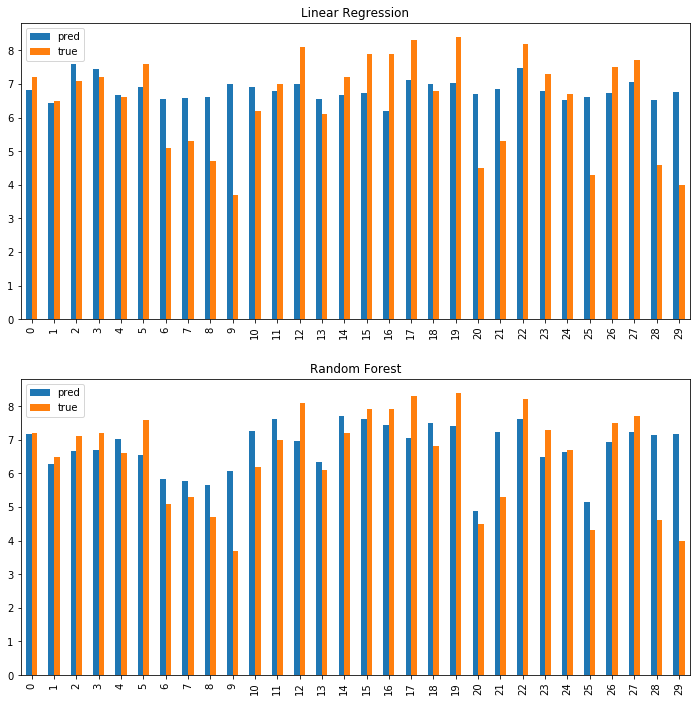

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=1)
linear_pred_df[["pred","true"]].plot(ax=axes[0],kind='bar', title="Linear Regression",figsize=(12,12))
randomforest_df[["pred", "true"]].plot(ax=axes[1], kind='bar', title='Random Forest');

Nhận xét: Với Random Forest mô hình cho kết quả tốt nhất.

##Working with test set

In [35]:

path = "./test"
#file_list = os.listdir("../testdata")
file_list = os.listdir(path)
data_tmp = []
for file in file_list:
    
    df = pd.read_csv(os.path.join(path,file))
    data_tmp.append(df)
test_X_df = pd.concat(data_tmp, axis = 0, ignore_index=True)


In [36]:
test_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
0,Tenet,0,An action epic revolving around internatio...,2020,"Action, Drama, Thriller","Elizabeth Debicki, Robert Pattinson, Aaron Tay...",Christopher Nolan,0,NaN
1,No Time to Die,0,Bond has left active service. His peace is...,2020,"Action, Adventure, Thriller","Ana de Armas, Daniel Craig, Léa Seydoux, Rami ...",Cary Joji Fukunaga,0,NaN
2,Birds of Prey: And the Fantabulous Emancipatio...,0,"After splitting with the Joker, Harley Qui...",2020,"Action, Adventure, Crime","Margot Robbie, Mary Elizabeth Winstead, Ewan M...",Cathy Yan,0,NaN
3,Black Widow,0,A film about Natasha Romanoff in her quest...,2020,"Action, Adventure, Sci-Fi","Florence Pugh, Scarlett Johansson, Robert Down...",Cate Shortland,0,NaN
4,Top Gun: Maverick,0,After more than thirty years of service as...,2020,"Action, Drama","Tom Cruise, Jennifer Connelly, Val Kilmer, Jea...",Joseph Kosinski,0,NaN


In [37]:
test_pred =full_pipeline.predict(fill_na(test_X_df))

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Visualize result of test set

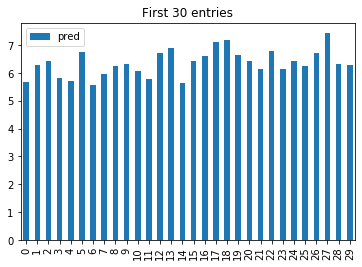

In [38]:
test_pred_df = pd.DataFrame(test_pred, columns=["pred"])
test_pred_df[:30].plot(kind = 'bar', title ='First 30 entries')

In [39]:
test_pred_df.to_csv("result.csv",header = True)